# LIME for Images

- [Online Course](https://www.trainindata.com/p/machine-learning-interpretability)

We'll take a pre-trained model for object recognition and explain its predictions.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions

from skimage.io import imread
from skimage.segmentation import mark_boundaries

from lime import lime_image

## Load pre-trained model

In [2]:
inet_model = inc_net.InceptionV3()

## Load and preprocess image

This function loads an image and preprocess it to the format needed for the inception model.

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Explaining a dog image

Load a dog image.

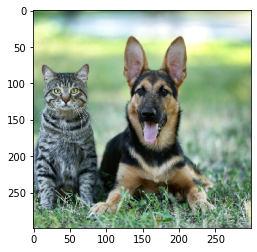

In [4]:
images = transform_img_fn(['1.png'])

# divide by 2 and add 0.5 because of 
# how Inception represents images
plt.imshow(images[0] / 2 + 0.5)

In [5]:
# obtain predictions from inception for
# this image

preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
('n02106662', 'German_shepherd', 0.9259444)
('n02108551', 'Tibetan_mastiff', 0.0027504864)
('n02105412', 'kelpie', 0.002332089)
('n02106550', 'Rottweiler', 0.0018465873)
('n02110063', 'malamute', 0.0016851615)


## Lime image explainer

In [6]:
# set up an explainer

explainer = lime_image.LimeImageExplainer(random_state=42)

In [7]:
# Hide color is the color for a superpixel turned OFF. 
# Alternatively, if it is NONE, the superpixel will be 
# replaced by the average of its pixels

dog = explainer.explain_instance(
    images[0].astype('double'), 
    inet_model.predict, 
    top_labels=5, 
    hide_color=0, 
    num_samples=1000,
    random_seed=43,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [8]:
# the model performance

dog.score

0.7316925060140995

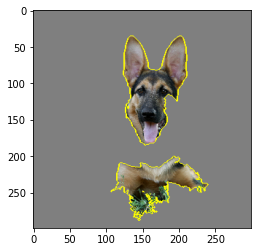

In [9]:
# explain why the model thinks it is a German Shepherd

temp, mask = dog.get_image_and_mask(
    dog.top_labels[0], # the probability to explain
    positive_only=True, # pixels that contribute to the prob
    num_features=8, 
    hide_rest=True, # hide rest of image
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

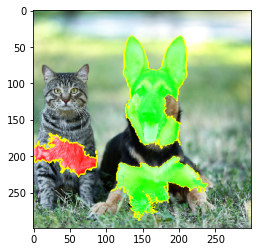

In [24]:
temp, mask = dog.get_image_and_mask(
    dog.top_labels[0],
    positive_only=False,
    num_features=10,
    hide_rest=False,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

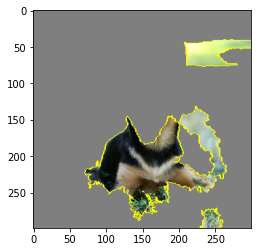

In [10]:
# Explain why the model thinks it is a
# Tibetan mastiff

temp, mask = dog.get_image_and_mask(
    dog.top_labels[1], 
    positive_only=True, 
    num_features=8, 
    hide_rest=True,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

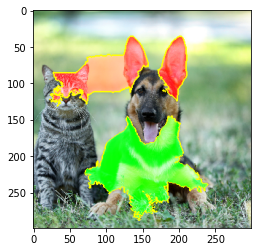

In [25]:
# Explain why the model thinks it is a
# Tibetan mastiff

temp, mask = dog.get_image_and_mask(
    dog.top_labels[1], 
    positive_only=False, 
    num_features=8, 
    hide_rest=False,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Explaining horses image

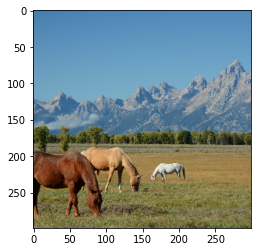

In [11]:
images = transform_img_fn(['2.png'])
plt.imshow(images[0] / 2 + 0.5)

In [12]:
# obtain inception's predictions

preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
('n02389026', 'sorrel', 0.23533988)
('n04604644', 'worm_fence', 0.05387307)
('n02437312', 'Arabian_camel', 0.046160832)
('n02422106', 'hartebeest', 0.037025996)
('n02403003', 'ox', 0.026807552)


In [13]:
# train LIME model

horse = explainer.explain_instance(
    images[0].astype('double'), 
    inet_model.predict, 
    top_labels=5, 
    hide_color=0, 
    num_samples=1000,
    random_seed=43,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [14]:
# model performance

horse.score

0.41280413506324365

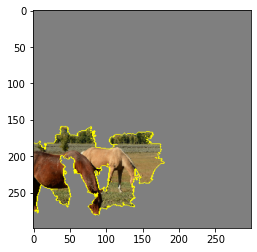

In [15]:
# explain why model thinks it is a horse

temp, mask = horse.get_image_and_mask(
    horse.top_labels[0], 
    positive_only=True, 
    num_features=8, 
    hide_rest=True,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

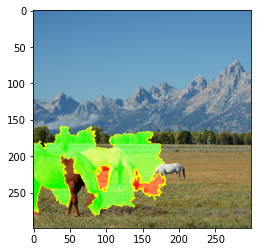

In [27]:
# explain why model thinks it is a horse

temp, mask = horse.get_image_and_mask(
    horse.top_labels[0], 
    positive_only=False, 
    num_features=10, 
    hide_rest=False,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

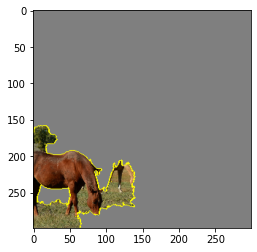

In [16]:
# explain why model thinks it is an
# arabian camel

temp, mask = horse.get_image_and_mask(
    horse.top_labels[2], 
    positive_only=True, 
    num_features=8, 
    hide_rest=True,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Explaining a mate gourd

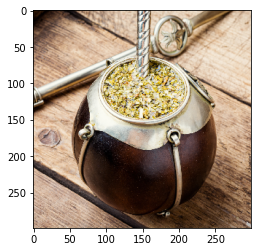

In [17]:
images = transform_img_fn(['3.png'])
plt.imshow(images[0] / 2 + 0.5)

In [18]:
# obtain inception's prediction

preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
('n04398044', 'teapot', 0.66901803)
('n03633091', 'ladle', 0.10656756)
('n03063689', 'coffeepot', 0.04288231)
('n02939185', 'caldron', 0.039006583)
('n04332243', 'strainer', 0.0055057323)


In [19]:
# train LIME model

mate = explainer.explain_instance(
    images[0].astype('double'), 
    inet_model.predict, 
    top_labels=5, 
    hide_color=0, 
    num_samples=1000,
    random_seed=43,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [20]:
# model performance

mate.score

0.6476386947439794

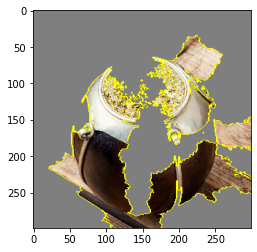

In [21]:
# explain why model thinks it is a teapot

temp, mask = mate.get_image_and_mask(
    mate.top_labels[0], 
    positive_only=True, 
    num_features=10, 
    hide_rest=True,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

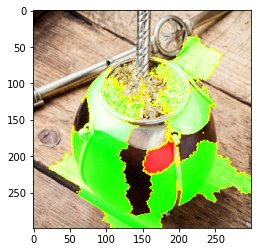

In [29]:
# explain why model thinks it is a teapot

temp, mask = mate.get_image_and_mask(
    mate.top_labels[0], 
    positive_only=False, 
    num_features=10, 
    hide_rest=False,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

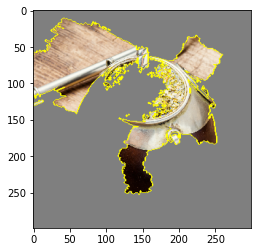

In [28]:
# explain why model thinks it is a ladle

temp, mask = mate.get_image_and_mask(
    mate.top_labels[1], 
    positive_only=True, 
    num_features=10, 
    hide_rest=True,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

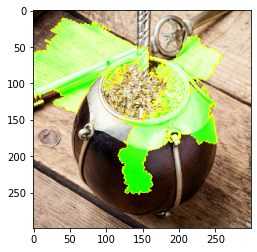

In [30]:
# explain why model thinks it is a ladle

temp, mask = mate.get_image_and_mask(
    mate.top_labels[1], 
    positive_only=False, 
    num_features=10, 
    hide_rest=False,
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))